#**Logistic Regression on Heart disease dataset**

Mounting google drive


In [85]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Loading required Libraries

In [86]:
import numpy as np
import pandas as pd
import csv

Loading the dataset(csv file) using pandas

In [87]:
df=pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


**Data processing**

The dataset consistss of both categorical values and  numerical values.
In order to apply logistic regression, convert all the categorical values to numeric. 

In [88]:
# the info() function describes the columns in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

List down all the unique values of each categorical variable(column)

In [89]:
print(df['Smoking'].unique())
print(df['AlcoholDrinking'].unique())
print(df['Stroke'].unique())
print(df['DiffWalking'].unique())
print(df['Sex'].unique())
print(df['AgeCategory'].unique())
print(df['Race'].unique())
print(df['Diabetic'].unique())
print(df['PhysicalActivity'].unique())
print(df['GenHealth'].unique())
print(df['Asthma'].unique())
print(df['KidneyDisease'].unique())
print(df['SkinCancer'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Yes' 'No']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In the dataset many columns contain only 2 unique values. So, we can use 0-1 encoding to represent these columns. 

In [90]:
# this is a user defined function that encodes the categorical columns
def change(col):
    if col=='Yes':
        return 1
    elif col=='No':
        return 0
# the apply() function puts value of each row one by one in a column to encode that whole column
# encoding all categorical columns having binary values
df['Smoking'] = df['Smoking'].apply(change)
df['AlcoholDrinking'] = df['AlcoholDrinking'].apply(change)
df['Stroke'] = df['Stroke'].apply(change)
df['DiffWalking'] = df['DiffWalking'].apply(change)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(change)
df['Asthma'] = df['Asthma'].apply(change)
df['KidneyDisease'] = df['KidneyDisease'].apply(change)
df['SkinCancer'] = df['SkinCancer'].apply(change)
df['HeartDisease'] = df['HeartDisease'].apply(change)

LabelEncoder function is used here to convert all the categorical columns that have more than two unique values

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
# Creating an instance of label encoder class
le = LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['AgeCategory']=le.fit_transform(df['AgeCategory'])
df['Race']=le.fit_transform(df['Race'])
df['Diabetic']=le.fit_transform(df['Diabetic'])
df['GenHealth']=le.fit_transform(df['GenHealth'])

Here is the processed dataset, which contain all numerical values.

In [93]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


Convert the dataframe in to nd-array to perform matrix operations.

In [94]:
data = np.array(df, dtype=float)

In [95]:
data.shape

(319795, 18)

Scaling the Features

scaled_Xi = (Xi - mean(Xi)) / std(Xi)


In [96]:
mu,std = [],[]
for i in range(1,data.shape[1]):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))
data

array([[ 0.        , -1.84475016,  1.19347355, ...,  2.54151479,
        -0.19555439,  3.11841916],
       [ 0.        , -1.25633812, -0.83789038, ..., -0.39346613,
        -0.19555439, -0.3206753 ],
       [ 0.        , -0.27460254,  1.19347355, ...,  2.54151479,
        -0.19555439, -0.3206753 ],
       ...,
       [ 0.        , -0.64275338, -0.83789038, ..., -0.39346613,
        -0.19555439, -0.3206753 ],
       [ 0.        ,  0.70555975, -0.83789038, ..., -0.39346613,
        -0.19555439, -0.3206753 ],
       [ 0.        ,  2.86883929, -0.83789038, ..., -0.39346613,
        -0.19555439, -0.3206753 ]])

Setting 'HeartDisease' as target variable(Y) and array of all the other columns as input feature vector(X).

In [97]:
X,Y = data[:,1:], data[:,0]
Y,X

(array([0., 0., 0., ..., 0., 0., 0.]),
 array([[-1.84475016,  1.19347355, -0.27031975, ...,  2.54151479,
         -0.19555439,  3.11841916],
        [-1.25633812, -0.83789038, -0.27031975, ..., -0.39346613,
         -0.19555439, -0.3206753 ],
        [-0.27460254,  1.19347355, -0.27031975, ...,  2.54151479,
         -0.19555439, -0.3206753 ],
        ...,
        [-0.64275338, -0.83789038, -0.27031975, ..., -0.39346613,
         -0.19555439, -0.3206753 ],
        [ 0.70555975, -0.83789038, -0.27031975, ..., -0.39346613,
         -0.19555439, -0.3206753 ],
        [ 2.86883929, -0.83789038, -0.27031975, ..., -0.39346613,
         -0.19555439, -0.3206753 ]]))

Splitting the dataset in to train and test sets.

In [98]:
x_train, x_test = X[:300000], X[300000:]
y_train, y_test = Y[:300000], Y[300000:]
x_train.shape, y_train.shape

((300000, 17), (300000,))

In [99]:
x_train = x_train.T
x_test = x_test.T

In [100]:
y_train = np.reshape(y_train, (1, len(y_train)))
y_train.shape

(1, 300000)

*   n_x = number of features
*   m = number of training examples
*   W = weights(parameters)
*   b = bias 
*   n_iters = nmber of iterations 


In [101]:
n_x = x_train.shape[0]
m = x_train.shape[1]
n_x, m

(17, 300000)

Defining the Sigmoid activation funtion

In [102]:
def sigmoid(Z):
  return 1/(1+np.exp(-Z))

**Training the model**

In [103]:
cost = []
iter = []
count = 0
W = np.random.uniform(0,1,n_x)
W = np.reshape(W, (n_x,1))
b = 0
alpha = 0.05
n_iter = 1000

for i in range(n_iter):
  Z = np.dot(W.T, x_train) + b
  A = sigmoid(Z)
  dZ = A - y_train 
  current_cost =  (1/m) * np.sum(-(y_train*np.log(A) + (1-y_train)*np.log(1-A)))
  if ((i+1)%100 == 0):
    print("The cost at {}th iteration is: {}".format(i+1, current_cost))
  cost.append(current_cost)
  dw=np.dot(x_train, dZ.T)
  dw=dw/m
  db = np.sum(dZ)/m
  W = W - alpha * dw
  b = b - alpha * db
  count = count+1
  iter.append(count)

The cost at 100th iteration is: 0.38043667074979876
The cost at 200th iteration is: 0.2750884839407358
The cost at 300th iteration is: 0.25286365206009065
The cost at 400th iteration is: 0.2444127374978632
The cost at 500th iteration is: 0.24018632488497194
The cost at 600th iteration is: 0.2377220812540442
The cost at 700th iteration is: 0.2361387265724376
The cost at 800th iteration is: 0.23505269355014996
The cost at 900th iteration is: 0.23427298279108028
The cost at 1000th iteration is: 0.23369451416358678


Plotting the cost function 

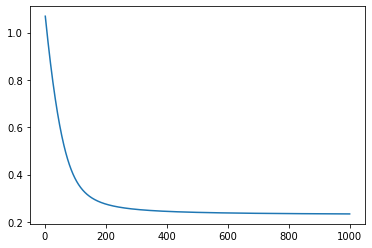

In [110]:
import matplotlib.pyplot as plt
plt.plot(iter,cost)
plt.show()

Testing the model 

In [105]:
Z_test = np.dot(W.T, x_test) + b
A_test = sigmoid(Z_test)
A_test.shape

(1, 19795)

In [106]:
# Target labels
y_test

array([0., 0., 0., ..., 0., 0., 0.])

The above output gives the probability of each person to have heart disease.
so, convert the probabilities to boolean values(0 or 1) 

*   If the probability is greater than 0.5, the person has heart disease(**output = 1**) otherwise the **output is 0**



In [107]:
preds = np.where(A_test[0] > 0.5, 1, 0)

Computing the test accuracy 

In [108]:
count = 0
for i in range(len(y_test)):
  if preds[i] == y_test[i]:
    count = count + 1
test_accuracy = count/len(y_test)

In [109]:
test_accuracy

0.908411214953271